
Solving TSP for 10 coordinates.
Running Genetic Algorithm...
Genetic Algorithm - Best state: [4 2 5 0 3 7 9 6 8 1]
Genetic Algorithm - Best fitness: 283.8665132230043
Running Random Hill Climb...
Random Hill Climb - Best state: [7 3 0 5 2 4 1 8 6 9]
Random Hill Climb - Best fitness: 283.8665132230043
Running Simulated Annealing...
Simulated Annealing - Best state: [3 0 5 2 4 1 8 6 9 7]
Simulated Annealing - Best fitness: 283.8665132230043

Solving TSP for 20 coordinates.
Running Genetic Algorithm...
Genetic Algorithm - Best state: [11 15 19 12  0  9  7 14 10 16  5 13  6 17  4  2  1  3  8 18]
Genetic Algorithm - Best fitness: 391.65417475398954
Running Random Hill Climb...
Random Hill Climb - Best state: [ 2  1 14 19 12  0  9  7  3 18 15 11  8 10 16  5 13  6 17  4]
Random Hill Climb - Best fitness: 419.87492527360115
Running Simulated Annealing...
Simulated Annealing - Best state: [ 7  3  8 18 19 12  0 15 11 10 16  5 13  6  9  1  4 17  2 14]
Simulated Annealing - Best fitness: 512.8592

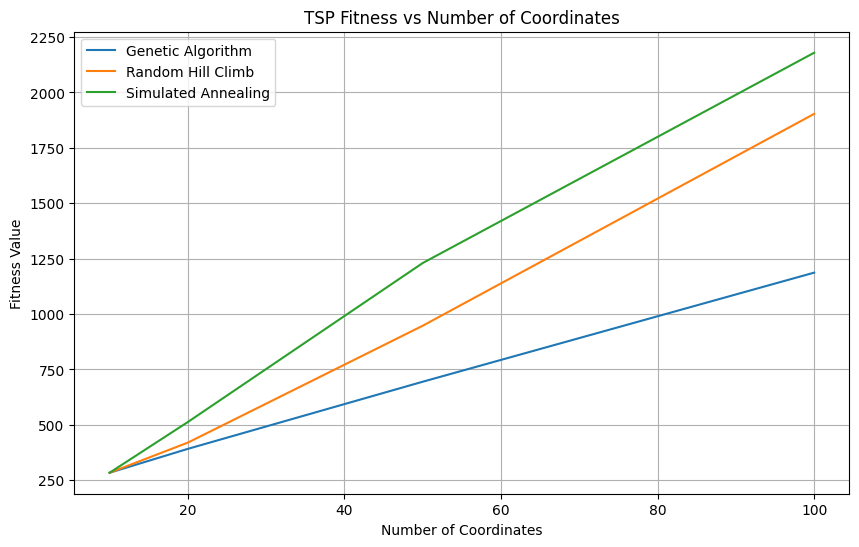

In [7]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt

def tsp_solver(coords_list):
    length = len(coords_list)  # Dynamic length based on input

    print(f"\nSolving TSP for {length} coordinates.")
    
    # Initialize fitness function object using coords_list
    fitness_coords = mlrose.TravellingSales(coords=coords_list)

    problem_fit = mlrose.TSPOpt(length=length, fitness_fn=fitness_coords, maximize=False)

    # Genetic Algorithm
    print("Running Genetic Algorithm...")
    best_state_ga, best_fitness_ga, fitness_curve_ga = mlrose.genetic_alg(problem_fit, 
                                                                          mutation_prob=0.2,
                                                                          max_attempts=100)
    print("Genetic Algorithm - Best state:", best_state_ga)
    print("Genetic Algorithm - Best fitness:", best_fitness_ga)

    # Random Hill Climb
    print("Running Random Hill Climb...")
    best_state_rhc, best_fitness_rhc, fitness_curve_rhc = mlrose.random_hill_climb(problem_fit,
                                                                                   max_attempts=100,
                                                                                   restarts=10)
    print("Random Hill Climb - Best state:", best_state_rhc)
    print("Random Hill Climb - Best fitness:", best_fitness_rhc)

    # Simulated Annealing
    print("Running Simulated Annealing...")
    best_state_sa, best_fitness_sa, fitness_curve_sa = mlrose.simulated_annealing(problem_fit,
                                                                                  schedule=mlrose.ExpDecay(),
                                                                                  max_attempts=100)
    print("Simulated Annealing - Best state:", best_state_sa)
    print("Simulated Annealing - Best fitness:", best_fitness_sa)

    return {
        'coords': length,
        'ga_fitness': best_fitness_ga,
        'rhc_fitness': best_fitness_rhc,
        'sa_fitness': best_fitness_sa
    }

def plot_performance(results):
    coords = [result['coords'] for result in results]
    ga_fitness = [result['ga_fitness'] for result in results]
    rhc_fitness = [result['rhc_fitness'] for result in results]
    sa_fitness = [result['sa_fitness'] for result in results]

    plt.figure(figsize=(10, 6))
    plt.plot(coords, ga_fitness, label='Genetic Algorithm')
    plt.plot(coords, rhc_fitness, label='Random Hill Climb')
    plt.plot(coords, sa_fitness, label='Simulated Annealing')

    plt.xlabel('Number of Coordinates')
    plt.ylabel('Fitness Value')
    plt.title('TSP Fitness vs Number of Coordinates')
    plt.legend()
    plt.grid(True)
    plt.show()

# Test with different numbers of coordinates
coordinate_counts = [10,20,50,100]
results = []

for count in coordinate_counts:
    coords_list = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(count)]
    result = tsp_solver(coords_list)
    results.append(result)

# Plot the performance of the algorithms
plot_performance(results)
